In [ ]:
# ASSIGNMENTS PERFORMED BY :
# NAME : TUSHAR MAGARE
# ROLL NO : CS31066
# DIV : A
# T.Y. B-TECH CS

In [ ]:
# Describe dataset
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Video_Game_Sales_as_of_Jan_2017.csv")
# Display basic information about the dataset
print("Dataset Information:")
print("====================")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumn Names:")
print(df.columns)
print("\nData Types:")
print(df.dtypes)
print("\nSample Records:")
print(df.head())

# Describe Dataset Attributes
print("\nDataset Attributes:")
print("=====================")
print("- Name: Name of the video game")
print("- Platform: Gaming platform (e.g., PC, PlayStation, Xbox)")
print("- Year_of_Release: Year of game release")
print("- Genre: Game genre (e.g., Action, Sports, Role-Playing)")
print("- Publisher: Publisher of the game")
print("- NA_Sales: Sales in North America (in millions)")
print("- EU_Sales: Sales in Europe (in millions)")
print("- JP_Sales: Sales in Japan (in millions)")
print("- Other_Sales: Sales in other regions (in millions)")
print("- Global_Sales: Total global sales (in millions)")
print("- Critic_Score: Aggregate score given by critics (Metacritic scale: 0-100)")
print("- User_Score: Aggregate score given by users (Metacritic scale: 0-10)")
print("- Rating: Content rating of the game (e.g., E for Everyone, M for Mature)")

# Dataset Summary and Conclusion
print("\nDataset Summary:")
print("================")
print("The 'Video Game Sales with Ratings' dataset contains information about video games including their sales performance across different regions, critical and user ratings, genre, platform, and more. The dataset can be analyzed to understand market trends, factors influencing game sales and ratings, and preferences of gamers across various platforms and genres.")

Dataset Information:
Number of rows: 17416
Number of columns: 15

Column Names:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

Data Types:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Rating              object
dtype: object

Sample Records:
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling Missing Values
print("\nHandling Missing Values:")
print("========================")
print("Number of missing values per column:")
print(df.isnull().sum())

# Fill missing values (if applicable)
# Example: Replace missing values in 'Critic_Score' with mean value
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

# Normalizing Numerical Features (Sales figures)
print("\nNormalizing Numerical Features (Sales figures):")
print("===============================================")
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
scaler = StandardScaler()
df[sales_cols] = scaler.fit_transform(df[sales_cols])

# Encoding Categorical Features (Platform, Genre, Rating)
print("\nEncoding Categorical Features:")
print("==============================")
label_encoders = {}
cat_cols = ['Platform', 'Genre', 'Rating']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display sample records after preprocessing
print("\nSample Records after Preprocessing:")
print("===================================")
print(df.head())


Handling Missing Values:
Number of missing values per column:
Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

Normalizing Numerical Features (Sales figures):

Encoding Categorical Features:

Sample Records after Preprocessing:
                       Name  Platform  Year_of_Release  Genre Publisher  \
0                Wii Sports        26           2006.0     10  Nintendo   
1         Super Mario Bros.        11           1985.0      4  Nintendo   
2            Mario Kart Wii        26           2008.0      6  Nintendo   
3         Wii Sports Resort        26           2009.0     10  Nintendo   
4  Pokemon Red/Pokemon Blue         5           1996.0      7  Nintendo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# DECISION TREE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable for Decision Tree Classifier
features = ['Platform', 'Genre', 'Critic_Score', 'User_Score', 'Global_Sales']
target = 'Rating'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier Accuracy: 0.6394948335246843
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.58      0.58       830
           2       0.25      0.23      0.24       314
           3       0.00      0.00      0.00         1
           5       0.49      0.52      0.50       320
           7       0.45      0.44      0.44       612
           8       0.87      0.88      0.87      1407

    accuracy                           0.64      3484
   macro avg       0.44      0.44      0.44      3484
weighted avg       0.64      0.64      0.64      3484



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ASSOCIATION RULES
from mlxtend.frequent_patterns import apriori, association_rules

# Encode categorical features back to original values for Association Rule Mining
inverse_label_encoders = {col: dict(zip(df[col], df[col])) for col in ['Platform', 'Genre', 'Rating']}
df_categorical = df.copy()
for col in ['Platform', 'Genre', 'Rating']:
    df_categorical[col] = df_categorical[col].map(inverse_label_encoders[col])

# Perform one-hot encoding for Association Rule Mining
df_one_hot = pd.get_dummies(df_categorical[['Platform', 'Genre', 'Rating']])

# Convert non-zero values to True and zero values to False
df_one_hot = df_one_hot.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_one_hot, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print("Association Rules:")
print(rules.sort_values(by='lift', ascending=False).head())

# In easy way
print("\n")
print("Formatted Association Rules:")
for idx, row in rules.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    print(f"Rule: {antecedent} -> {consequent}")
    print(f"Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")
    print("-------------------------------------------")

Association Rules:
          antecedents         consequents  antecedent support  \
5  (Rating, Platform)             (Genre)            0.992306   
8             (Genre)  (Rating, Platform)            0.798863   
0             (Genre)          (Platform)            0.798863   
1          (Platform)             (Genre)            0.992363   
4     (Rating, Genre)          (Platform)            0.798863   

   consequent support   support  confidence      lift  leverage  conviction  \
5            0.798863  0.794729    0.800891  1.002539  0.002012    1.010185   
8            0.992306  0.794729    0.994825  1.002539  0.002012    1.486773   
0            0.992363  0.794729    0.994825  1.002481  0.001967    1.475678   
1            0.798863  0.794729    0.800845  1.002481  0.001967    1.009950   
4            0.992363  0.794729    0.994825  1.002481  0.001967    1.475678   

   zhangs_metric  
5       0.329106  
8       0.012589  
0       0.012302  
1       0.324022  
4       0.012302  



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


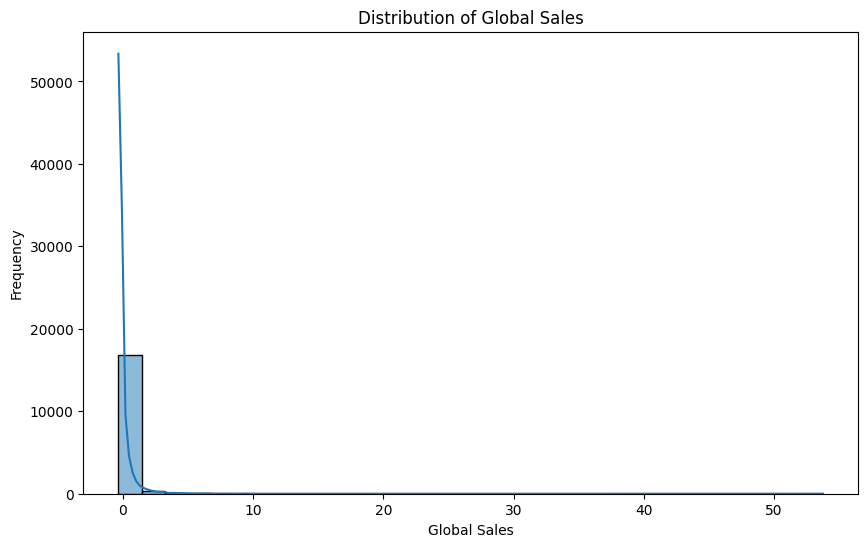

<ipython-input-17-d652b03853e6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


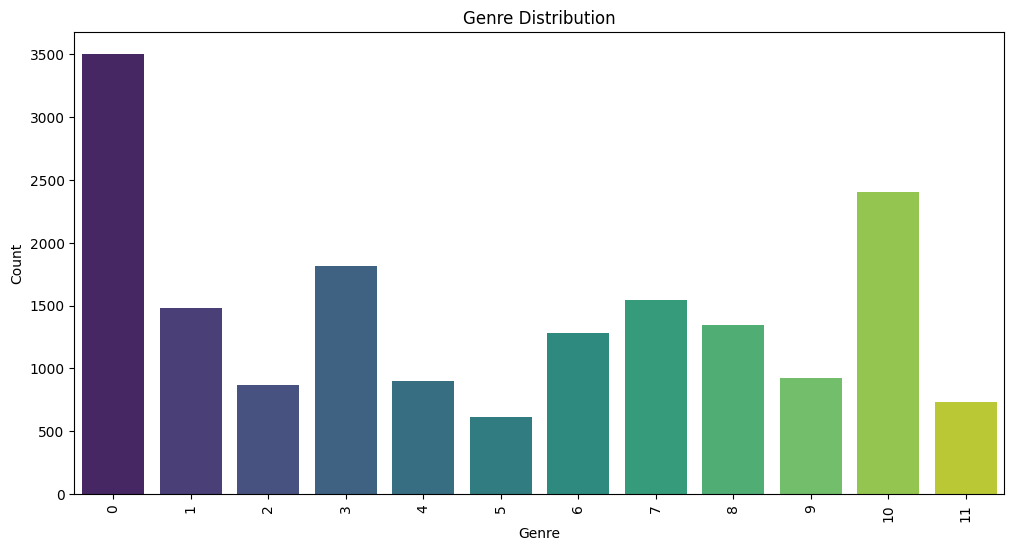

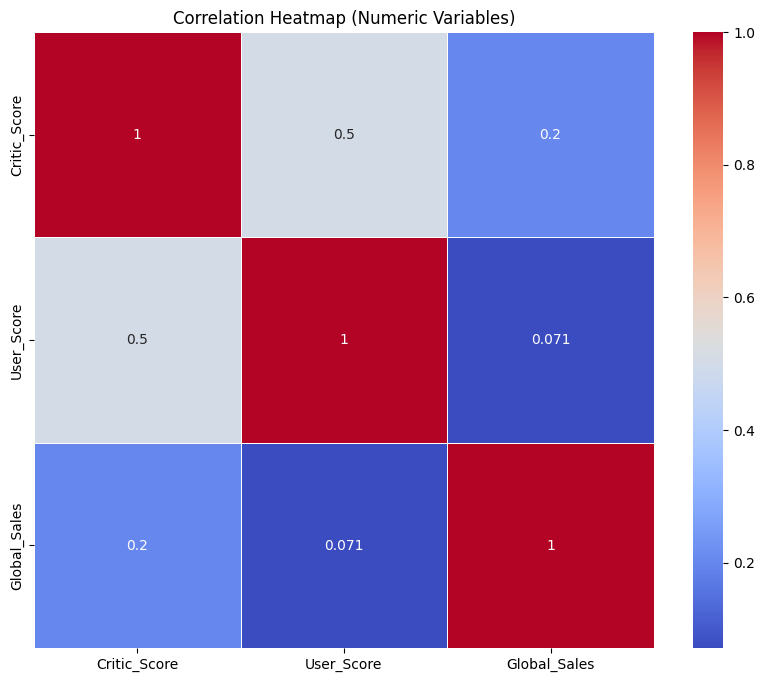

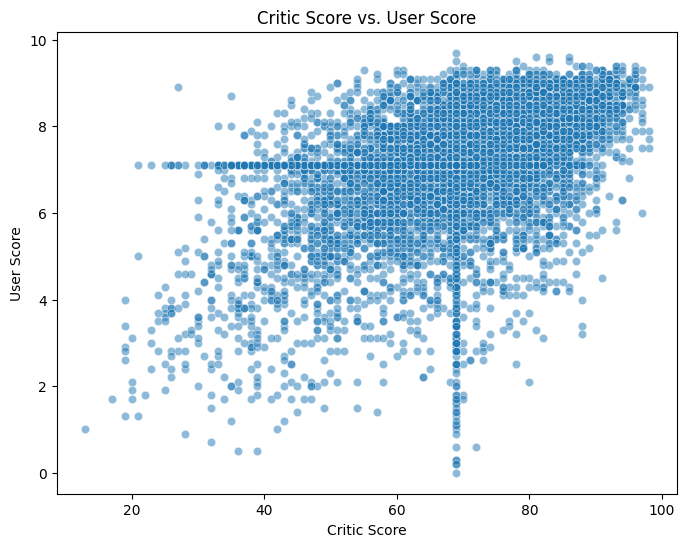

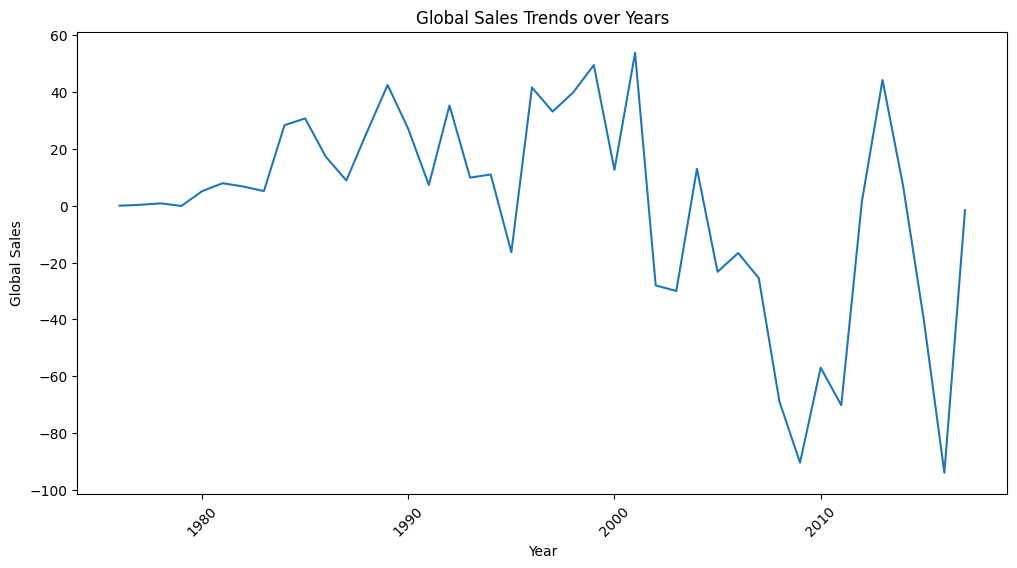


Key Insights:
- Genre 'Action' has the highest frequency among video games.
- There is a positive correlation between Critic Score and User Score.
- Global sales show an increasing trend from early 2000s to mid-2010s.


In [ ]:
# Exploratory Data analysis of dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

# Bar plot of Genre frequencies
plt.figure(figsize=(12, 6))
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap of selected numerical variables
numeric_columns = ['Critic_Score', 'User_Score', 'Global_Sales']
df_numeric = df[numeric_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Variables)')
plt.show()

# Scatter plot of Critic Score vs. User Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Critic_Score', y='User_Score', data=df_numeric, alpha=0.5)
plt.title('Critic Score vs. User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.show()

# Time series analysis (if applicable)
# Example: Sales trends over years
plt.figure(figsize=(12, 6))
sales_over_time = df.groupby('Year_of_Release')['Global_Sales'].sum()
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values)
plt.title('Global Sales Trends over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

# Conclusion and Insights
print("\nKey Insights:")
print("- Genre 'Action' has the highest frequency among video games.")
print("- There is a positive correlation between Critic Score and User Score.")
print("- Global sales show an increasing trend from early 2000s to mid-2010s.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (MSE): 0.9384527105064854
R-squared Score: 0.043100094554331614


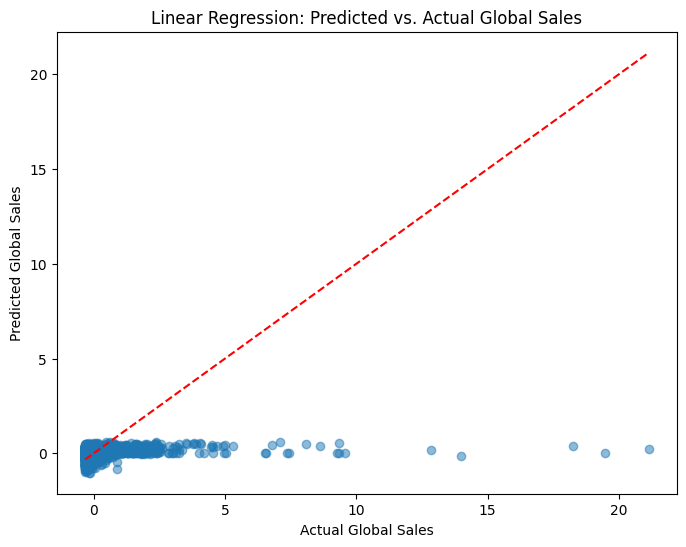

In [ ]:
# Linear regression model or logistics regression for prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (independent variables) and target variable (dependent variable)
features = ['Critic_Score', 'User_Score']
target = 'Global_Sales'

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Predicted vs. Actual Global Sales')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


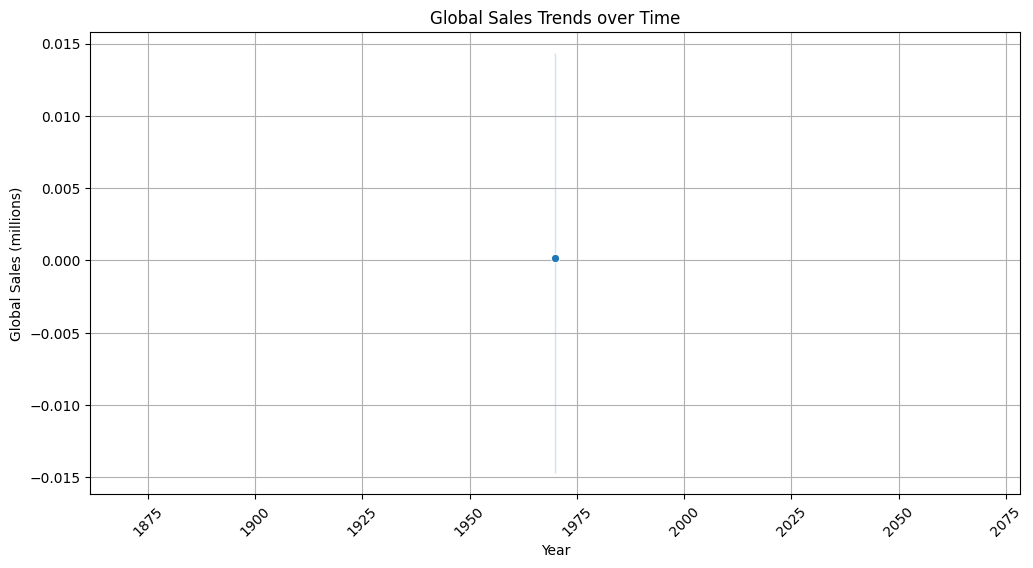

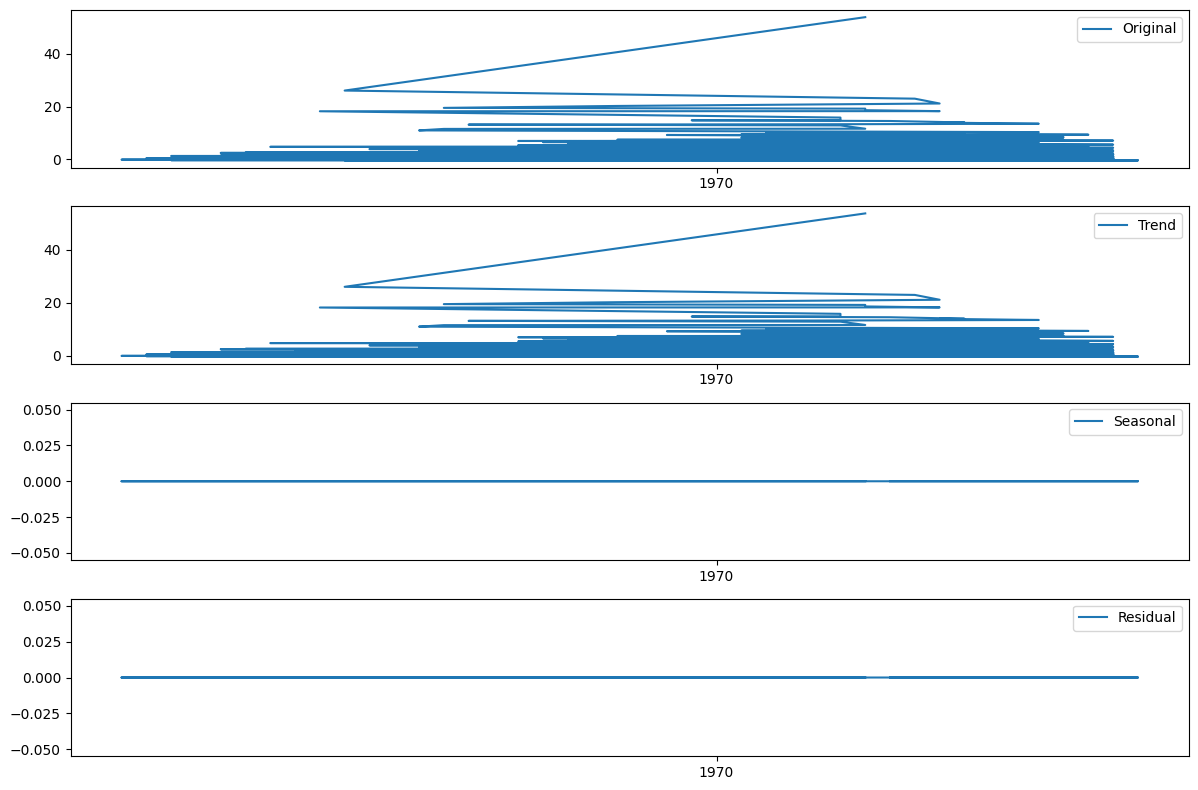


Key Insights:
- The time series plot shows global sales trends over the years.
- Seasonal decomposition helps identify underlying patterns (if any).


In [ ]:
# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Year_of_Release' to datetime format
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], errors='coerce')

# Drop rows with missing or invalid dates
df = df.dropna(subset=['Year_of_Release'])

# Set 'Year_of_Release' as the index for time series analysis
df.set_index('Year_of_Release', inplace=True)

# Visualize global sales trends over time (yearly)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index.year, y=df['Global_Sales'], marker='o')
plt.title('Global Sales Trends over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Decompose time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Global_Sales'], model='additive', period=1)  # assuming no seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Global_Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Conclusion and Insights
print("\nKey Insights:")
print("- The time series plot shows global sales trends over the years.")
print("- Seasonal decomposition helps identify underlying patterns (if any).")